In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Rice_data.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


In [4]:
rice_data = data.drop(['label','urban_area_proximity','frost_risk'], axis =1)
rice_data = rice_data.rename(columns={'temperature': 'T', 'humidity': 'H', 'soil_moisture': 'Soil_M', 'soil_type':'Soil_T','sunlight_exposure': 'Sun_E','wind_speed': 'W_S', 'co2_concentration':'CO2_CONC', 'organic_matter':'Organic_M','irrigation_frequency':'Irr_F','crop_density':'Crop_D', 'pest_pressure': 'Pest_Pr','fertilizer_usage':'Fert_U','growth_stage':'Growth_St','water_source_type':'Water_S','water_usage_efficiency':'Water_U_Eff'})


In [5]:
rice_data

,N,P,K,T,H,ph,rainfall,Soil_M,Soil_T,Sun_E,W_S,CO2_CONC,Organic_M,Irr_F,Crop_D,Pest_Pr,Fert_U,Growth_St,Water_S,Water_U_Eff
0,90,42,43,20.879744,82.002744,6.502985,202.935536,29.446064,2,8.677355,10.109875,435.611226,3.121395,4,11.743910,57.607308,188.194958,1,3,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,12.851183,3,5.754288,12.048050,401.451860,2.142021,4,16.797101,74.736879,70.963629,1,2,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,29.363913,2,9.875230,9.051349,357.417963,1.474974,1,12.654395,1.034478,191.976077,1,2,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,26.207732,3,8.023685,7.963606,363.694306,8.393907,1,10.864360,24.091888,55.761388,3,3,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,28.236236,2,8.120512,19.264133,410.356458,5.202285,3,13.852910,38.811481,185.259702,2,3,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,10.697757,1,10.330875,19.192361,439.079069,4.720355,5,18.597260,87.431199,185.833381,3,1,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,12.203830,3,6.070558,10.603401,405.259540,4.141148,6,15.417979,36.958354,198.541021,2,3,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,28.989176,3,11.097182,13.842016,360.482605,1.599614,5,12.956675,79.678658,86.724381,2,3,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,13.642305,2,8.097337,16.537831,415.514314,8.934077,6,16.868131,31.007156,72.191421,2,3,4.119388


In [6]:
# Defining the States, Actions and Reward 

# State : Environmental and soil conditions 

state_col = ['T','H','ph','rainfall','Soil_M','Sun_E','W_S','CO2_CONC','Crop_D','Growth_St']

# Action : Parameter for the agent to control

action_col = ['Irr_F','Fert_U']

# Reward : Efficiency 

reward_col = ['Water_U_Eff']

In [7]:
# reward
reward = rice_data[reward_col]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_data = pd.DataFrame(scaler.fit_transform(rice_data), columns=rice_data.columns)

# Display the first few rows of the normalized data
print(norm_data.head())

# If you need to separate state and action data
state_col = ['T', 'H', 'ph', 'rainfall', 'Soil_M', 'Sun_E', 'W_S', 'CO2_CONC', 'Crop_D', 'Growth_St']
action_col = ['Irr_F', 'Fert_U']

state_data = norm_data[state_col]
action_data = norm_data[action_col]

          N         P      K         T         H        ph  rainfall  \
0  0.642857  0.264286  0.190  0.345886  0.790267  0.466264  0.656458   
1  0.607143  0.378571  0.180  0.371445  0.770633  0.549480  0.741675   
2  0.428571  0.357143  0.195  0.406854  0.793977  0.674219  0.875710   
3  0.528571  0.214286  0.175  0.506901  0.768751  0.540508  0.799905   
4  0.557143  0.264286  0.185  0.324378  0.785626  0.641291  0.871231   

     Soil_M  Soil_T     Sun_E       W_S  CO2_CONC  Organic_M  Irr_F    Crop_D  \
0  0.972374     0.5  0.525962  0.505643  0.856244   0.235427    0.6  0.449780   
1  0.141533     1.0  0.107803  0.602608  0.514592   0.126567    0.6  0.787017   
2  0.968261     0.5  0.697323  0.452686  0.074178   0.052423    0.0  0.510544   
3  0.810243     1.0  0.432451  0.398267  0.136952   0.821480    0.0  0.391082   
4  0.911802     0.5  0.446302  0.963621  0.603653   0.466723    0.4  0.590529   

    Pest_Pr    Fert_U  Growth_St  Water_S  Water_U_Eff  
0  0.576005  0.921299  

In [9]:
# Features (X) will be all columns except 'Irr_F', 'Fert_U', and 'Water_U_Eff'
X = norm_data.drop(['Irr_F', 'Fert_U', 'Water_U_Eff'], axis=1)

In [10]:
# Targets (y) will be 'Irr_F' and 'Fert_U'
y_irr = norm_data['Irr_F']
y_fert = norm_data['Fert_U']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_irr_train, y_irr_test, y_fert_train, y_fert_test = train_test_split(
    X, y_irr, y_fert, test_size=0.2, random_state=42)

In [12]:
rf_irr = RandomForestRegressor(n_estimators=100, random_state=42)
rf_fert = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
rf_irr.fit(X_train, y_irr_train)
rf_fert.fit(X_train, y_fert_train)

RandomForestRegressor(random_state=42)

In [14]:
# Make predictions
y_irr_pred = rf_irr.predict(X_test)
y_fert_pred = rf_fert.predict(X_test)

In [15]:
# Evaluate the models
mse_irr = mean_squared_error(y_irr_test, y_irr_pred)
r2_irr = r2_score(y_irr_test, y_irr_pred)

In [16]:
mse_fert = mean_squared_error(y_fert_test, y_fert_pred)
r2_fert = r2_score(y_fert_test, y_fert_pred)

In [17]:
print(f"Irrigation Model - MSE: {mse_irr:.4f}, R2: {r2_irr:.4f}")
print(f"Fertilizer Model - MSE: {mse_fert:.4f}, R2: {r2_fert:.4f}")

Irrigation Model - MSE: 0.1265, R2: -0.0384
Fertilizer Model - MSE: 0.0885, R2: -0.0674


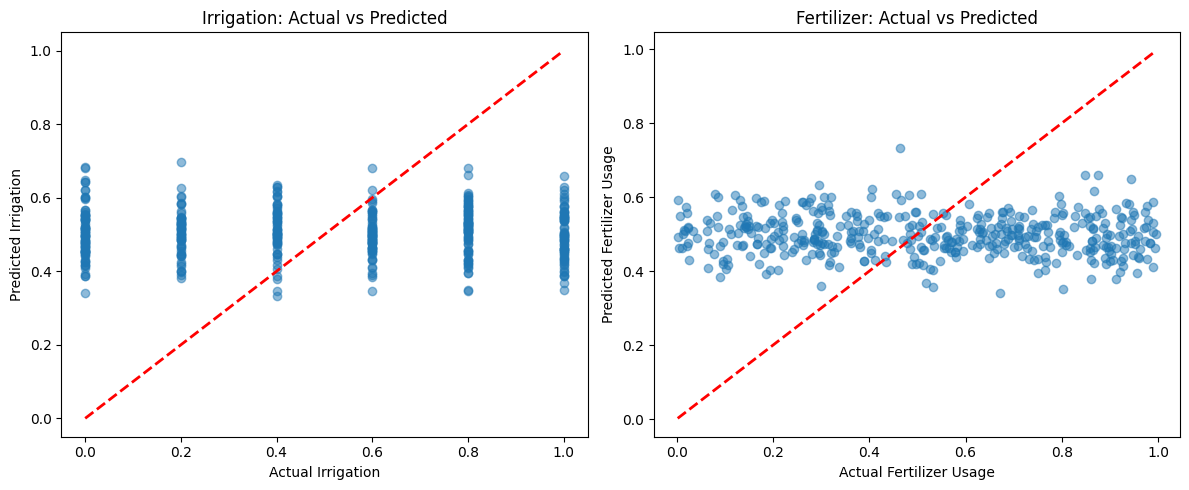

In [18]:
# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_irr_test, y_irr_pred, alpha=0.5)
plt.plot([y_irr_test.min(), y_irr_test.max()], [y_irr_test.min(), y_irr_test.max()], 'r--', lw=2)
plt.xlabel('Actual Irrigation')
plt.ylabel('Predicted Irrigation')
plt.title('Irrigation: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_fert_test, y_fert_pred, alpha=0.5)
plt.plot([y_fert_test.min(), y_fert_test.max()], [y_fert_test.min(), y_fert_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fertilizer Usage')
plt.ylabel('Predicted Fertilizer Usage')
plt.title('Fertilizer: Actual vs Predicted')

plt.tight_layout()
plt.show()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np

# Set style for better-looking plots
# plt.style.use('seaborn')

# 1. Scatter plot of predicted vs actual values
def plot_predicted_vs_actual(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.tight_layout()
    plt.show()



# 2. Feature importance plot
def plot_feature_importance(model, features, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()


# 3. Residual plot
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()


# 4. Distribution of errors
def plot_error_distribution(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()



# 5. Learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()



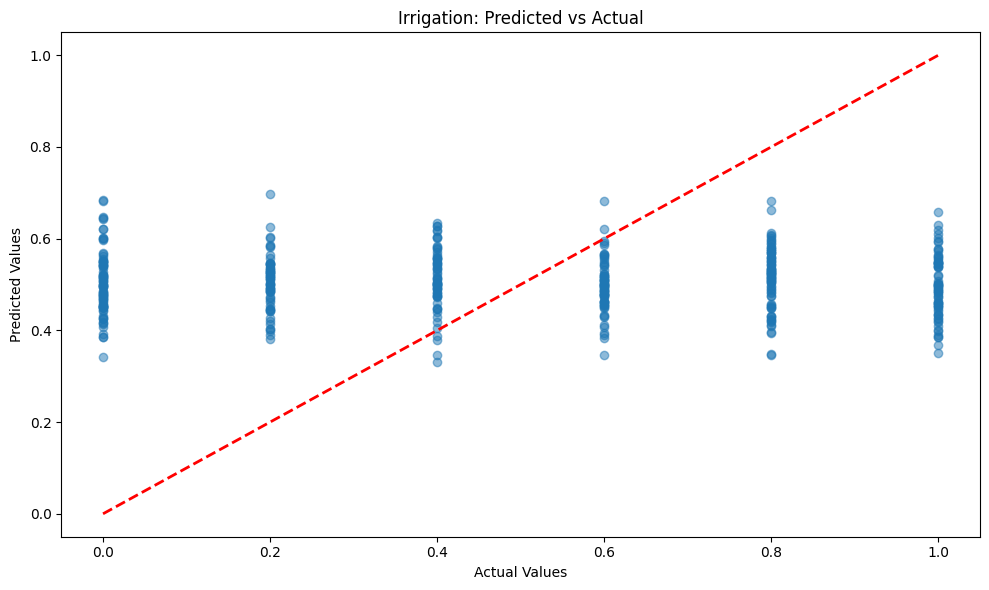

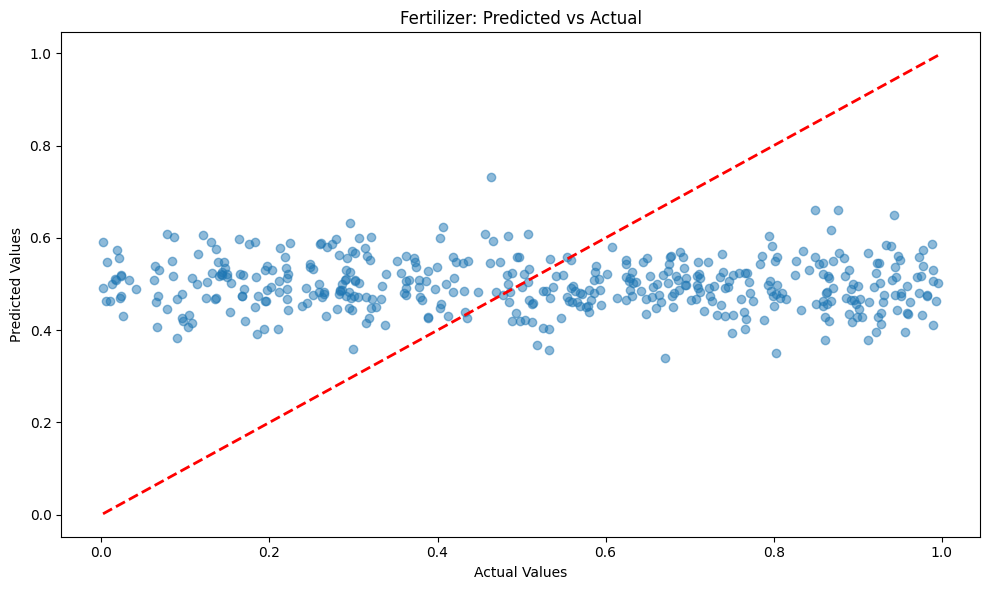

In [21]:
plot_predicted_vs_actual(y_irr_test, y_irr_pred, 'Irrigation: Predicted vs Actual')
plot_predicted_vs_actual(y_fert_test, y_fert_pred, 'Fertilizer: Predicted vs Actual')

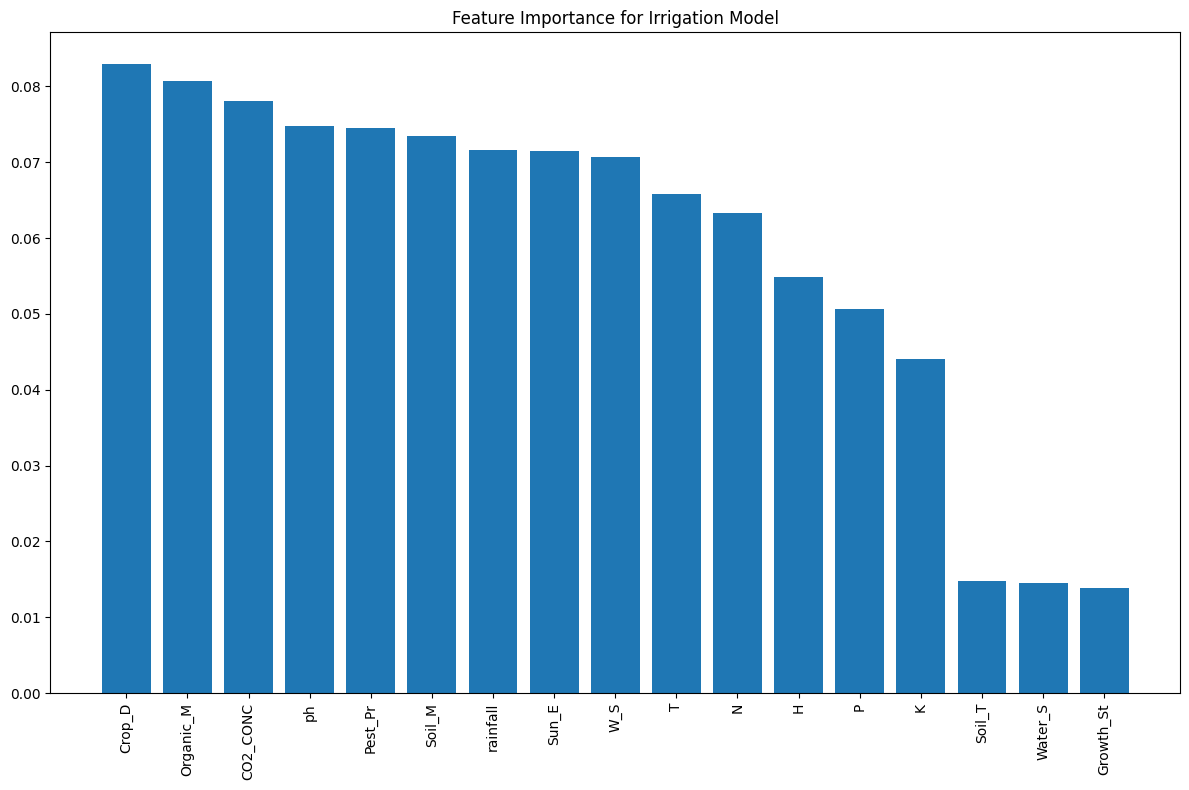

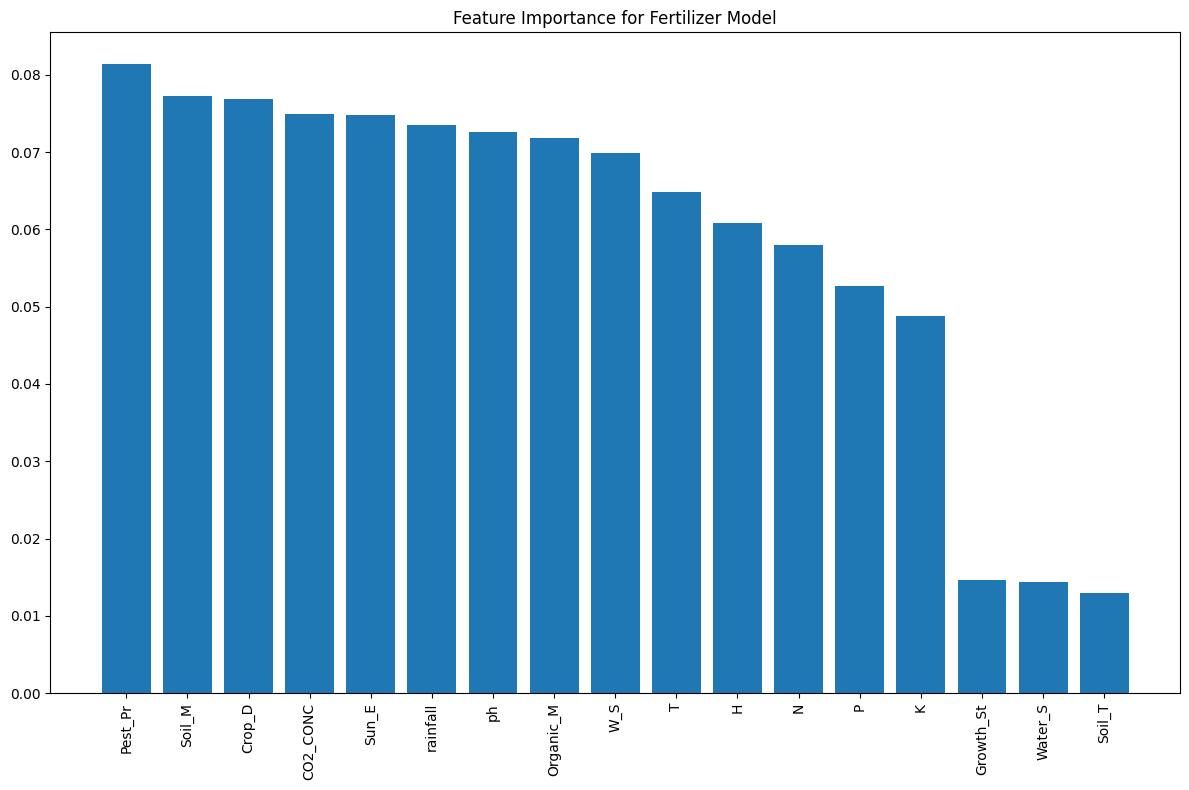

In [22]:
plot_feature_importance(rf_irr, X_train.columns, 'Feature Importance for Irrigation Model')
plot_feature_importance(rf_fert, X_train.columns, 'Feature Importance for Fertilizer Model')


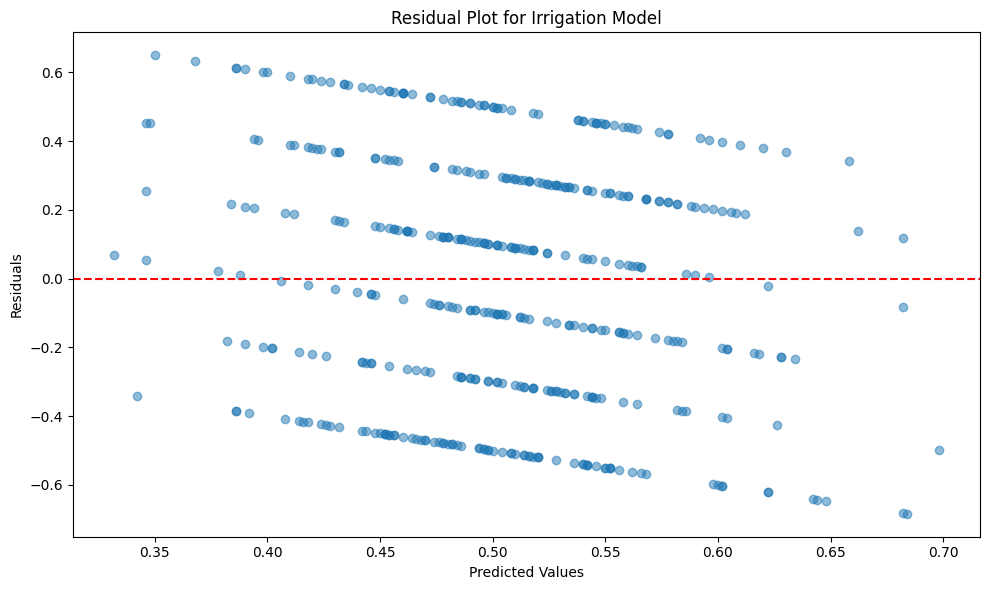

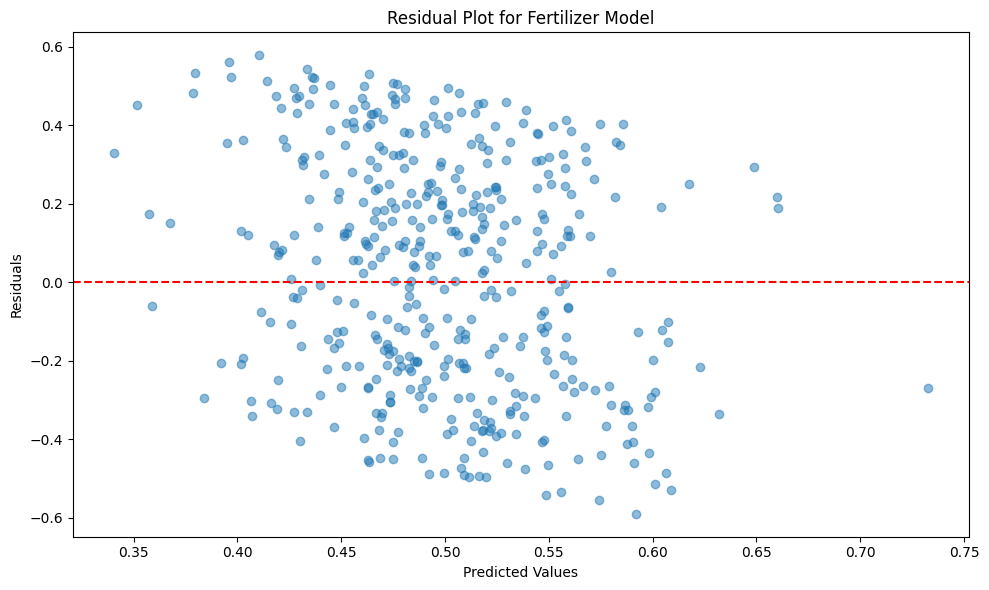

In [23]:
plot_residuals(y_irr_test, y_irr_pred, 'Residual Plot for Irrigation Model')
plot_residuals(y_fert_test, y_fert_pred, 'Residual Plot for Fertilizer Model')


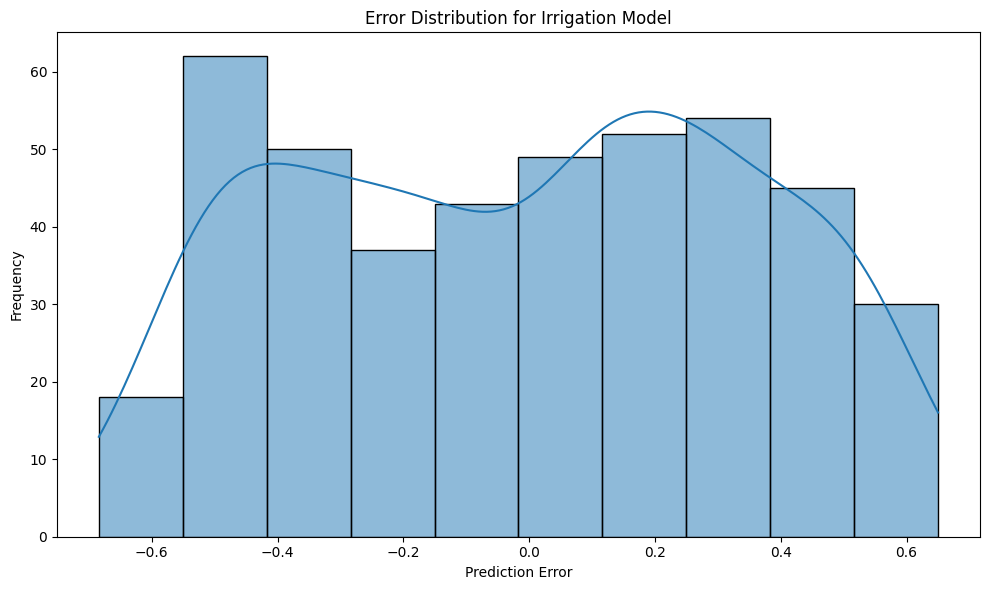

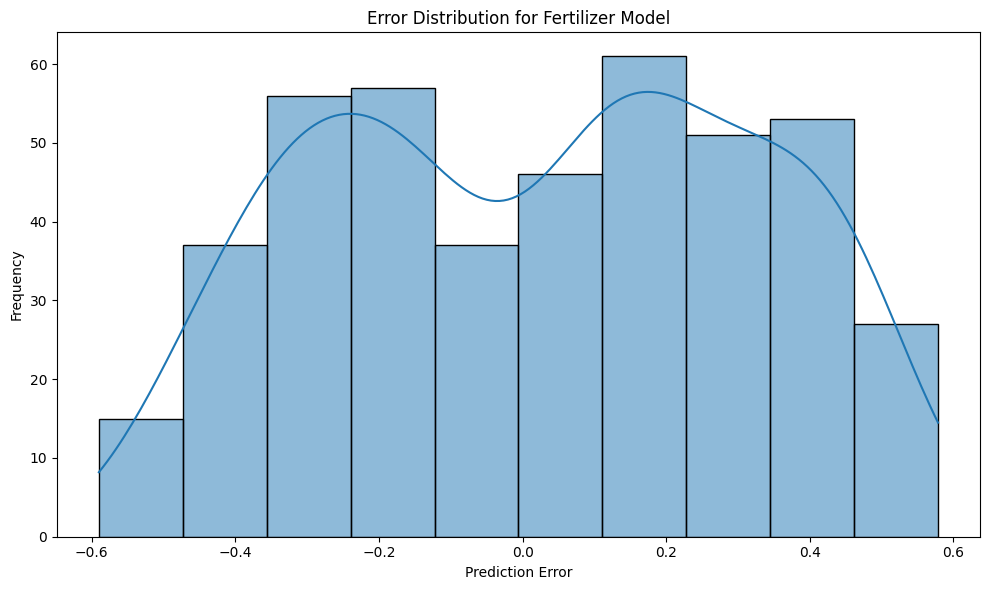

In [ ]:
plot_error_distribution(y_irr_test, y_irr_pred, 'Error Distribution for Irrigation Model')
plot_error_distribution(y_fert_test, y_fert_pred, 'Error Distribution for Fertilizer Model')

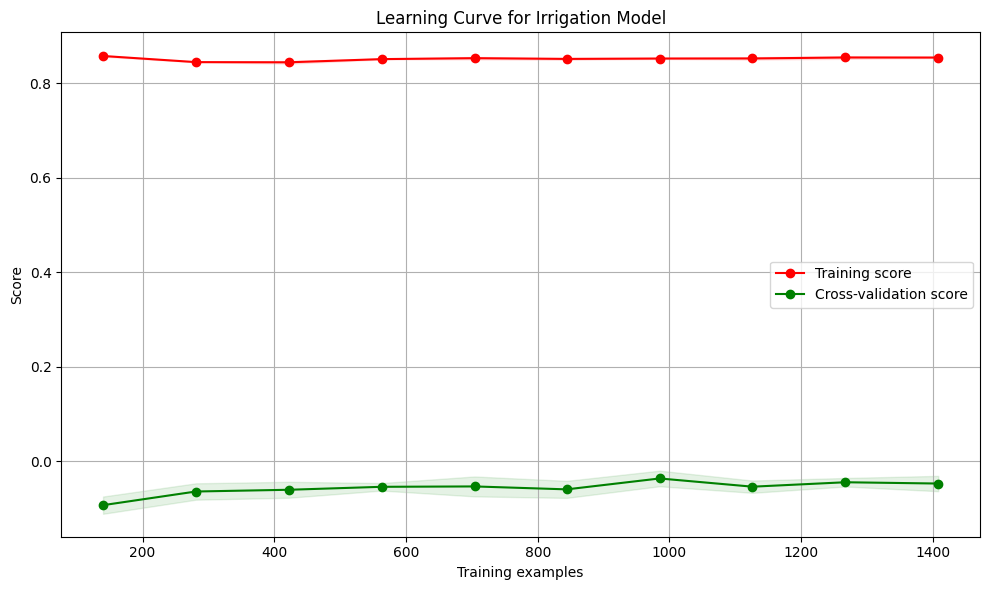

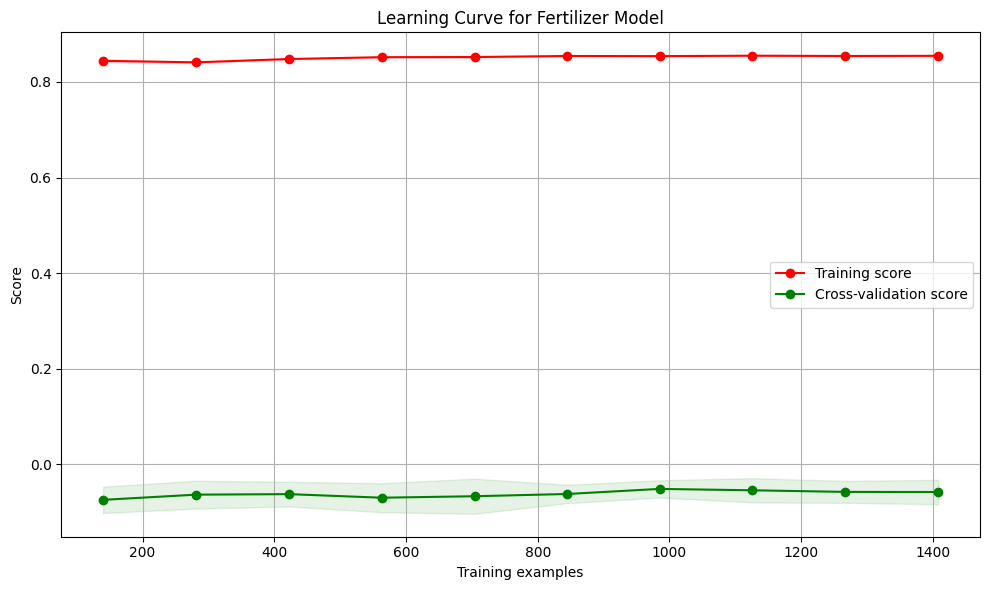

In [ ]:
plot_learning_curve(rf_irr, X_train, y_irr_train, "Learning Curve for Irrigation Model")
plot_learning_curve(rf_fert, X_train, y_fert_train, "Learning Curve for Fertilizer Model")